In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio

from robustness.audio_functions.jsinV3DataLoader_precombined import *
from robustness.audio_functions.audio_transforms import *

In [2]:
from lightning_scripts import architectures

In [4]:
architectures.__dict__['SSLAudioModel']

lightning_scripts.architectures.SSLAudioModel

In [2]:
example_path = "/mnt/ceph/users/jfeather/data/training_datasets_audio/JSIN_all_v3/subsets/valid_RQTTZB4C3TJJVLJUWDV72TYMC7S4MNHH/JSIN_all__run_000_RQTTZB4C3TJJVLJUWDV72TYMC7S4MNHH.h5"
example_path_dir = "/mnt/ceph/users/jfeather/data/training_datasets_audio/JSIN_all_v3/subsets"
transform = AudioCompose(
    [
        AudioToTensor(),
        CombineWithRandomDBSNR()
    ]
)
example_dset = H5Dataset(example_path, transform=transform, target_keys=['signal/word_int'])
#example_dset_paired = H5DatasetPaired(example_path, transform=transform, target_keys=['signal/word_int'])
example_dset_paired = jsinV3_precombined_paired(example_path_dir, transform=transform, train=True)

In [3]:
len(example_dset_paired) / 1024

2837.109375

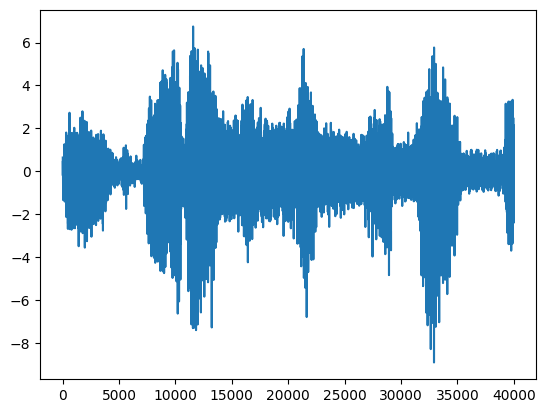

In [4]:
wave, label = example_dset.__getitem__(10)
plt.plot(wave)
Audio(wave, rate=20000)

In [5]:
example_dset_paired[10]

(tensor([1.8020, 1.6752, 1.4785,  ..., 0.2046, 0.1392, 0.0621]),
 tensor([-1.1842, -1.3693, -1.4546,  ..., -2.9818, -2.6852, -2.2964]),
 tensor([3.6349, 3.1477, 2.9656,  ..., 0.5235, 0.3255, 0.1239]),
 tensor([-1.4637, -1.8621, -1.6609,  ..., -3.4918, -3.1654, -2.7216]),
 729,
 353)

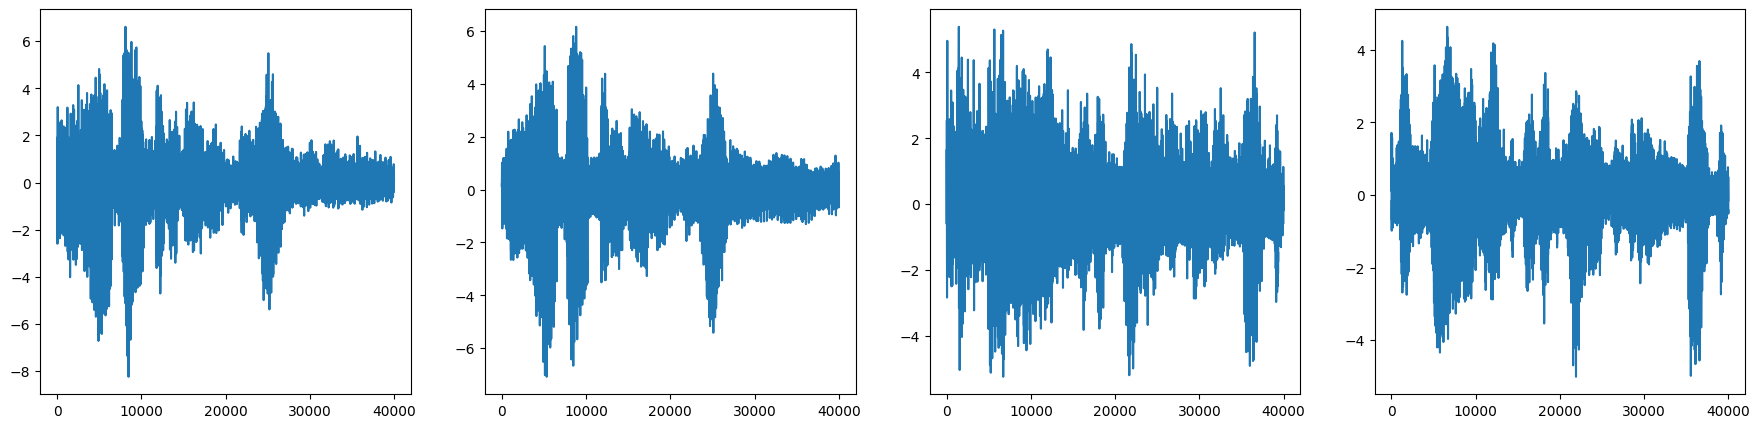

In [6]:
wave_11, wave_12, wave_21, wave_22, label_1, label_2 = example_dset_paired.__getitem__(10)
fig, axs = plt.subplots(1, 4, figsize=(22, 5))
axs[0].plot(wave_11)
axs[1].plot(wave_12)
axs[2].plot(wave_21)
axs[3].plot(wave_22)
Audio(wave_11, rate=20000)

In [7]:
Audio(wave_12, rate=20000)

In [8]:
Audio(wave_21, rate=20000)

In [9]:
Audio(wave_22, rate=20000)

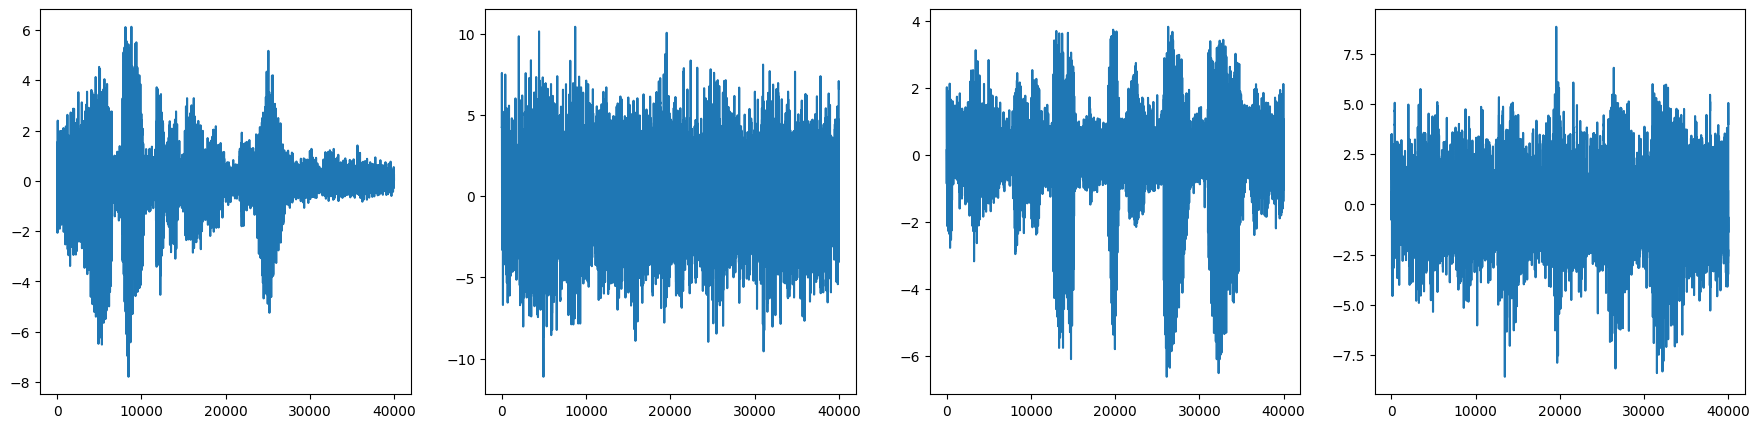

In [10]:
example_dset_paired._rotate_splits()
wave_11, wave_12, wave_21, wave_22, label_1, label_2 = example_dset_paired.__getitem__(10)
fig, axs = plt.subplots(1, 4, figsize=(22, 5))
axs[0].plot(wave_11)
axs[1].plot(wave_12)
axs[2].plot(wave_21)
axs[3].plot(wave_22)
Audio(wave_11, rate=20000)

In [11]:
Audio(wave_12, rate=20000)

In [12]:
Audio(wave_21, rate=20000)

In [13]:
Audio(wave_22, rate=20000)

In [14]:
len(example_dset)

16812

In [15]:
!nvidia-smi

Sat Sep  7 15:23:07 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla V100-SXM2-32GB           Off |   00000000:3B:00.0 Off |                    0 |
| N/A   27C    P0             41W /  300W |       1MiB /  32768MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [16]:
from robustness.model_utils import make_and_restore_model
from robustness.datasets import jsinV3

/mnt/ceph/users/igriffith/projects/cochdnn/robustness/attacker.py:79: SyntaxWarning: invalid escape sequence '\e'
  """
/mnt/ceph/users/igriffith/projects/cochdnn/robustness/attack_steps.py:40: SyntaxWarning: invalid escape sequence '\m'
  '''
/mnt/ceph/users/igriffith/projects/cochdnn/robustness/attack_steps.py:54: SyntaxWarning: invalid escape sequence '\e'
  '''
/mnt/ceph/users/igriffith/projects/cochdnn/robustness/attack_steps.py:87: SyntaxWarning: invalid escape sequence '\e'
  """
/mnt/ceph/users/igriffith/projects/cochdnn/robustness/attack_steps.py:114: SyntaxWarning: invalid escape sequence '\e'
  """
/mnt/ceph/users/igriffith/projects/cochdnn/robustness/attack_steps.py:145: SyntaxWarning: invalid escape sequence '\e'
  """
/mnt/ceph/users/igriffith/projects/cochdnn/robustness/attack_steps.py:204: SyntaxWarning: invalid escape sequence '\e'
  """


In [17]:
model = jsinV3(
    data_path='/mnt/ceph/users/jfeather/data/training_datasets_audio/JSIN_all_v3/subsets',
)

In [18]:
loaders = model.make_loaders(workers=0, batch_size=16)

==> Preparing dataset jsinV3..
/mnt/ceph/users/jfeather/data/training_datasets_audio/JSIN_all_v3/subsets


In [19]:
train_loader, test_loader = loaders

In [20]:
x = next(iter(test_loader))

In [21]:
inputs, labels = x
print(inputs.shape)


torch.Size([16, 1, 256, 401])


In [30]:
inputs.min(), inputs.max()

(tensor(5.7199e-11), tensor(6703.7788))

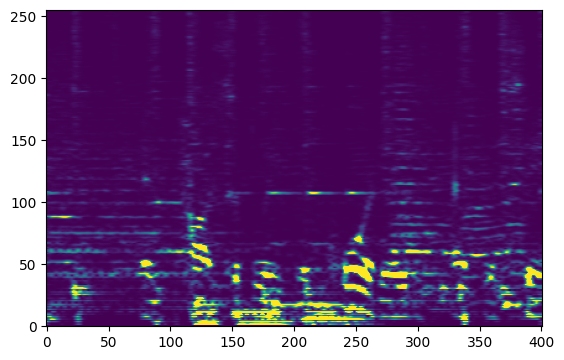

In [33]:
batch_index = 5
plt.imshow(inputs[batch_index, 0].numpy(), origin='lower', vmin=0, vmax=100)

In [23]:
len(train_loader)

363163

Sat Sep  7 15:44:34 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla V100-SXM2-32GB           Off |   00000000:3B:00.0 Off |                    0 |
| N/A   28C    P0             41W /  300W |       1MiB /  32768MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Simple Training Loop

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
from tqdm import tqdm

import torch
from torch import nn
import torchvision
from torchvision.models.resnet import resnet50
import torch.nn.functional as F

from robustness.audio_functions.jsinV3DataLoader_precombined import *
from robustness.audio_functions.audio_transforms import *
from robustness.audio_functions.audio_input_representations import AUDIO_INPUT_REPRESENTATIONS

In [4]:
train_path = "/mnt/ceph/users/jfeather/data/training_datasets_audio/JSIN_all_v3/subsets/valid_RQTTZB4C3TJJVLJUWDV72TYMC7S4MNHH/JSIN_all__run_000_RQTTZB4C3TJJVLJUWDV72TYMC7S4MNHH.h5"
val_path = "/mnt/ceph/users/jfeather/data/training_datasets_audio/JSIN_all_v3/subsets/valid_RQTTZB4C3TJJVLJUWDV72TYMC7S4MNHH/JSIN_all__run_005_RQTTZB4C3TJJVLJUWDV72TYMC7S4MNHH.h5"

mel_spec_0_config = AUDIO_INPUT_REPRESENTATIONS["mel_spec_0"]
cochleagram_1_config = AUDIO_INPUT_REPRESENTATIONS["cochleagram_1"]

transform = AudioCompose(
    [
        AudioToTensor(),
        CombineWithRandomDBSNR(),
        DBSPLNormalizeForegroundAndBackground(dbspl=60),
        UnsqueezeAudio(dim=0),

        # AudioToMelSpectrogram(mel_spec_0['rep_kwargs'])
        # AudioToMelSpectrogram()
        # AudioToCochleagram(cgram_kwargs=)
    ]
)
# mel_spec = AudioToMelSpectrogram(mel_spec_0['rep_kwargs'])
mel_spec = AudioToAudioRepresentation(**mel_spec_0_config)
cochgram = AudioToAudioRepresentation(**cochleagram_1_config)

#example_path_dir = "/mnt/ceph/users/jfeather/data/training_datasets_audio/JSIN_all_v3/subsets"
#train_dset = jsinV3_precombined_paired(example_path_dir, transform=transform, train=True)
#val_dset = jsinV3_precombined(example_path_dir, transform=transform, train=False)

train_dset = H5DatasetPaired(train_path, transform=transform, target_keys=['signal/word_int'])
val_dset = H5Dataset(val_path, transform=transform, target_keys=['signal/word_int'])

train_loader = torch.utils.data.DataLoader(train_dset, batch_size=32, shuffle=False, num_workers=4)
val_loader = torch.utils.data.DataLoader(val_dset, batch_size=16, shuffle=False, num_workers=1)

In [5]:
import scipy.signal
scipy.__version__

'1.14.1'

In [6]:
batch_train = next(iter(train_loader))
batch_val = next(iter(val_loader))

In [7]:
spec_11, spec_12, spec_21, spec_22, labels_1, labels_2 = batch_train
print(spec_11.shape)
print(spec_12.shape)
print(spec_21.shape)
print(spec_22.shape)
print(labels_1.shape)
print(labels_2.shape)

spec_test, val_labels = batch_val
print(spec_test.shape)
print(val_labels.shape)

torch.Size([32, 1, 40000])
torch.Size([32, 1, 40000])
torch.Size([32, 1, 40000])
torch.Size([32, 1, 40000])
torch.Size([32])
torch.Size([32])
torch.Size([16, 1, 40000])
torch.Size([16])


In [8]:
# spec_11, spec_12, spec_21, spec_22, labels_1, labels_2 = batch_train
# print(spec_11.shape)
# print(spec_12.shape)
# print(spec_21.shape)
# print(spec_22.shape)
# print(labels_1.shape)
# print(labels_2.shape)

# spec_test, val_labels = batch_val
# print(spec_test.shape)
# print(val_labels.shape)

In [9]:
class SSAudioModel(nn.Module):
    def __init__(self, projector_dims=[512, 512], supervised=False):
        super().__init__()
        self.supervised = supervised

        self.f = resnet50()
        self.f.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        self.f.fc = nn.Identity()

        # projection head (Following exactly barlow twins offical repo)
        projector_dims = [2048] + projector_dims
        layers = []
        for i in range(len(projector_dims) - 2):
            layers.append(
                nn.Linear(projector_dims[i], projector_dims[i + 1], bias=False)
            )
            layers.append(nn.BatchNorm1d(projector_dims[i + 1]))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(projector_dims[-2], projector_dims[-1], bias=False))
        self.g = nn.Sequential(*layers)

        self.lin_cls = nn.Linear(2048, 794)

    def forward(self, x):
        x_ = self.f(x)
        feature = torch.flatten(x_, start_dim=1)
        out = self.g(feature)
        if not self.supervised:
            logits = self.lin_cls(feature.detach()) 
        else:
            logits = self.lin_cls(feature)
        return feature, out, logits

class MMCR_Loss(nn.Module):
    def __init__(self, distributed=False):
        super().__init__()
        self.distributed = distributed
    
    def forward(self, z1, z2):
        z1 = F.normalize(z1, dim=-1, p=2)
        z2 = F.normalize(z2, dim=-1, p=2)
        if self.distributed:
            z1, z2 = self.gather(z1), self.gather(z2)
        c = (z1 + z2) / 2.0

        return -1.0 * torch.linalg.svdvals(c).sum()

    def gather(self, tensor):
        tensor_list = [torch.zeros_like(tensor) for i in range(torch.distributed.get_world_size())]
        torch.distributed.all_gather(tensor_list, tensor, async_op=False)
        tensor_list[torch.distributed.get_rank()] = tensor
        return torch.cat(tensor_list)

def calculate_accuracy(logits, labels):
    preds = torch.argmax(logits, dim=1)
    return (preds == labels).float().mean()

In [10]:
# import os, random
# import numpy as np
# import torch.distributed as dist

# from collections import defaultdict, deque
# import time, datetime, signal
# import subprocess
# from pathlib import Path
# import random

# from argparse import Namespace 
# args = Namespace(**{})
# def handle_sigusr1(signum, frame):
#     os.system(f'scontrol requeue {os.getenv("SLURM_JOB_ID")}')
#     exit()


# def handle_sigterm(signum, frame):
#     pass

# def init_dist_node(args):
#     if "SLURM_JOB_ID" in os.environ:
#         args.ngpus_per_node = torch.cuda.device_count()

#         # requeue job on SLURM preemption
#         signal.signal(signal.SIGUSR1, handle_sigusr1)
#         signal.signal(signal.SIGTERM, handle_sigterm)

#         # find a common host name on all nodes
#         cmd = "scontrol show hostnames " + os.getenv("SLURM_JOB_NODELIST")
#         stdout = subprocess.check_output(cmd.split())
#         host_name = stdout.decode().splitlines()[0]
#         args.dist_url = f"tcp://{host_name}:{random.randint(49152, 65535)}"
#         args.host_name_ = host_name

#         # distributed parameters
#         args.rank = int(os.getenv("SLURM_NODEID")) * args.ngpus_per_node
#         args.world_size = int(os.getenv("SLURM_NNODES")) * args.ngpus_per_node

#     else:
#         os.environ["CUDA_VISIBLE_DEVICES"] = args.gpus
#         args.ngpus_per_node = torch.cuda.device_count()

#         args.rank = 0
#         args.dist_url = f"tcp://localhost:{args.port}"
#         args.world_size = args.ngpus_per_node

# init_dist_node(args)
# print(args)
# dist.init_process_group(
#         backend="gloo",
#         init_method=args.dist_url,
#         world_size=args.world_size,
#         rank=args.rank,
# )

In [11]:
class ModelWithFrontent(nn.Module):
    def __init__(self,front_end, model):
        super().__init__()
        self.front_end = front_end
        self.model = model

    def forward(self, x):
        x, _ = self.front_end(x, None)
        feature, out, logits = self.model(x)
        return feature, out, logits

In [12]:
supervised = True
model = SSAudioModel(supervised=supervised)
model = ModelWithFrontent(cochgram, model).cuda()
# model = torch.compile(model).cuda()
#model = nn.DataParallel(model)
#model = nn.SyncBatchNorm.convert_sync_batchnorm(model)
loss = MMCR_Loss(distributed=False).cuda()
loss_class = nn.CrossEntropyLoss().cuda()
lambda_mmcr = 0.03

optim = torch.optim.Adam(model.parameters(), lr=3e-4)
num_epochs = 20 
#split_2_cache = [train_loader.dataset.split_2]
mmcr_losses = []
class_losses = []
accuracies = []
for epoch in range(num_epochs):
    for batch in tqdm(train_loader):
        spec_11, spec_12, spec_21, spec_22, labels_1, labels_2 = batch
        # spec_11, spec_12, spec_21, spec_22 = spec_11.unsqueeze(1), spec_12.unsqueeze(1), spec_21.unsqueeze(1), spec_22.unsqueeze(1)

        optim.zero_grad()

        _, out_11, logits_11 = model(spec_11.cuda())
        _, out_12, logits_12 = model(spec_12.cuda())
        _, out_21, logits_21 = model(spec_21.cuda())
        _, out_22, logits_22 = model(spec_22.cuda())
        
        # equivariant grouping 
        outs_1 = torch.cat([out_11, out_21], dim=0)
        outs_2 = torch.cat([out_12, out_22], dim=0)

        loss_mmcr = loss(outs_1, outs_2)

        # classification grouping 
        class_1_logits = torch.cat([logits_11, logits_12], dim=0)
        class_2_logits = torch.cat([logits_21, logits_22], dim=0)

        class_1_labels = torch.cat([labels_1,labels_1], dim=0).cuda()

        class_loss_11 = loss_class(logits_11, labels_1.cuda())
        class_loss_12 = loss_class(logits_12, labels_1.cuda())
        class_loss_21 = loss_class(logits_21, labels_2.cuda())
        class_loss_22 = loss_class(logits_22, labels_2.cuda())
        class_loss = class_loss_11 + class_loss_12 + class_loss_21 + class_loss_22
        class_loss = class_loss / 4.0

        total_loss = lambda_mmcr * loss_mmcr + class_loss
        # total_loss = class_loss

        total_loss.backward()
        optim.step()

        acc = calculate_accuracy(logits_11, labels_1.cuda()).item()


        mmcr_losses.append(class_loss.item())
        class_losses.append(class_loss.item())
        accuracies.append(acc)

    train_loader.dataset._rotate_splits()
    # split_2_cache.append(train_loader.dataset.split_2)
    


  0%|          | 0/263 [00:00<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 516.00 MiB. GPU 0 has a total capacity of 31.73 GiB of which 430.69 MiB is free. Process 1102309 has 29.77 GiB memory in use. Including non-PyTorch memory, this process has 1.54 GiB memory in use. Of the allocated memory 1.15 GiB is allocated by PyTorch, and 30.02 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [2]:
import gc
import torch
torch.cuda.empty_cache()
gc.collect()

0

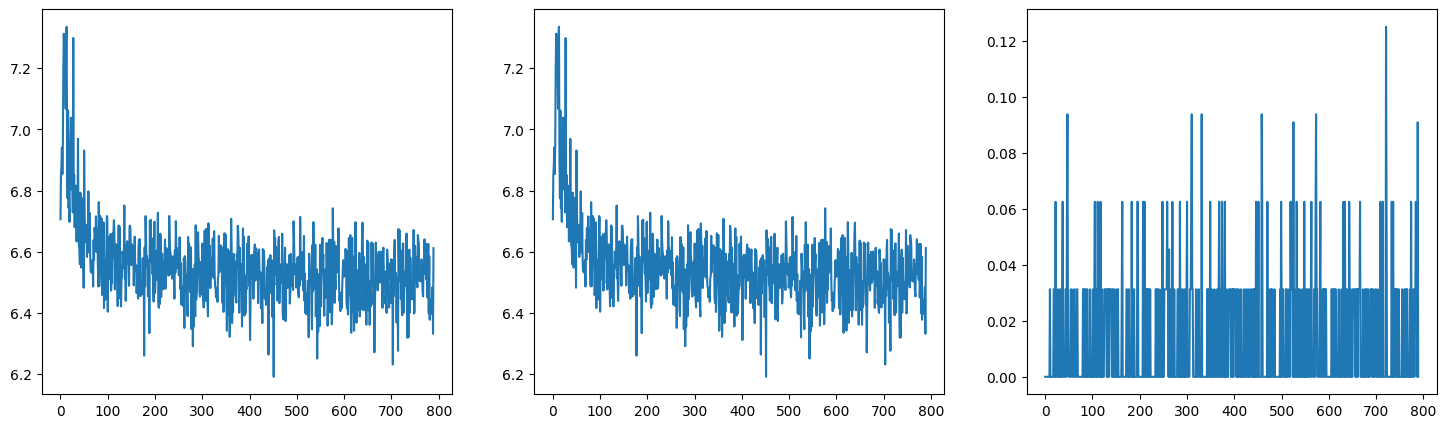

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].plot(mmcr_losses)
axs[1].plot(class_losses)
axs[2].plot(accuracies)



In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].plot(mmcr_losses)
axs[1].plot(class_losses)
axs[2].plot(accuracies)



In [ ]:
### For reference, way to get architectures from robustness repo
# Get audio model from config that will be loaded
from robustness import audio_models
model = audio_models.__dict__[self.config['arch_name']](**self.config['arch_kwargs'])
model.fc = nn.Identity()

